In [1]:
import pandas as pd
import geopandas as gpd

gdf = gpd.read_file("database_germany_all/industrial_landuse_labeled_filtered_geo_json_files.gpkg")

# Get unique labels and their counts
label_counts = gdf['label'].value_counts()
label_counts

label
Abwasserbehandlungsanlage                                                                                      2086
Gasspeicheranlage                                                                                              1618
Biomassekraftwerk                                                                                              1132
Logistikzentrum                                                                                                 888
Solarkraftwerk                                                                                                  754
                                                                                                               ... 
Kernkraftwerk                                                                                                     1
Zuckerwerk                                                                                                        1
Zuckerraffinerie is not in the list, so None                      

In [2]:
from services.cnn_model import load_data

X, y = load_data("/Users/lukasflaig/PycharmProjects/OSMData/data/dataset_germany", limit_per_class=1100, selected_labels=["Abwasserbehandlungsanlage", "Gasspeicheranlage", "Biomassekraftwerk"])

Verwendete Klassen: ['Abwasserbehandlungsanlage', 'Gasspeicheranlage', 'Biomassekraftwerk']
Geladene Samples: 3300
Shape pro Sample: (512, 512, 4)


In [3]:
print("X shape:", X.shape)

X shape: (3300, 512, 512, 4)


In [4]:
pd.DataFrame(y).value_counts()

0                        
Abwasserbehandlungsanlage    1100
Biomassekraftwerk            1100
Gasspeicheranlage            1100
Name: count, dtype: int64

In [5]:
from services.cnn_model import preprocess_data

X_train, X_test, y_train, y_test, num_classes, label_encoder = preprocess_data(X, y)

Preprocessing data...
Number of classes: 3
Training samples: 2640
Testing samples: 660


In [6]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2640, 512, 512, 4)
y_train shape: (2640, 3)
X_test shape: (660, 512, 512, 4)
y_test shape: (660, 3)


In [7]:
input_shape = X_train.shape[1:]
input_shape

(512, 512, 4)

In [8]:
from services.cnn_model import build_model

model = build_model((512, 512, 4), num_classes)

Building the CNN model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (

In [9]:
from services.cnn_model import compile_model

compile_model(model, lr=0.0001)

Compiling the model...


In [10]:
from services.cnn_model import train_model

history = train_model(model, X_train, y_train, X_test, y_test, batch_size=16, epochs=50)

Setting up callbacks...
Starting training...
Epoch 1/50
165/165 [==============================] - 249s 2s/step - loss: 1.2757 - accuracy: 0.5917 - val_loss: 0.9623 - val_accuracy: 0.7182
Epoch 2/50
165/165 [==============================] - 287s 2s/step - loss: 0.8438 - accuracy: 0.6947 - val_loss: 0.8756 - val_accuracy: 0.7197
Epoch 3/50
165/165 [==============================] - 238s 1s/step - loss: 0.6913 - accuracy: 0.7625 - val_loss: 0.8564 - val_accuracy: 0.7121
Epoch 4/50
165/165 [==============================] - 247s 1s/step - loss: 0.5642 - accuracy: 0.8114 - val_loss: 0.8879 - val_accuracy: 0.7045
Epoch 5/50
165/165 [==============================] - 268s 2s/step - loss: 0.4995 - accuracy: 0.8538 - val_loss: 0.9161 - val_accuracy: 0.6970
Epoch 6/50
165/165 [==============================] - 250s 2s/step - loss: 0.4194 - accuracy: 0.8811 - val_loss: 0.9126 - val_accuracy: 0.7106
Epoch 7/50
165/165 [==============================] - 230s 1s/step - loss: 0.4128 - accuracy: 0.8

In [11]:
from services.cnn_model import evaluate_model

evaluate_model(model, X_test, y_test)

Evaluating the model on the test set...
21/21 - 14s - loss: 0.8564 - accuracy: 0.7121 - 14s/epoch - 676ms/step
Test Accuracy: 71.21%


(0.8564080595970154, 0.7121211886405945)

Plotting training history...


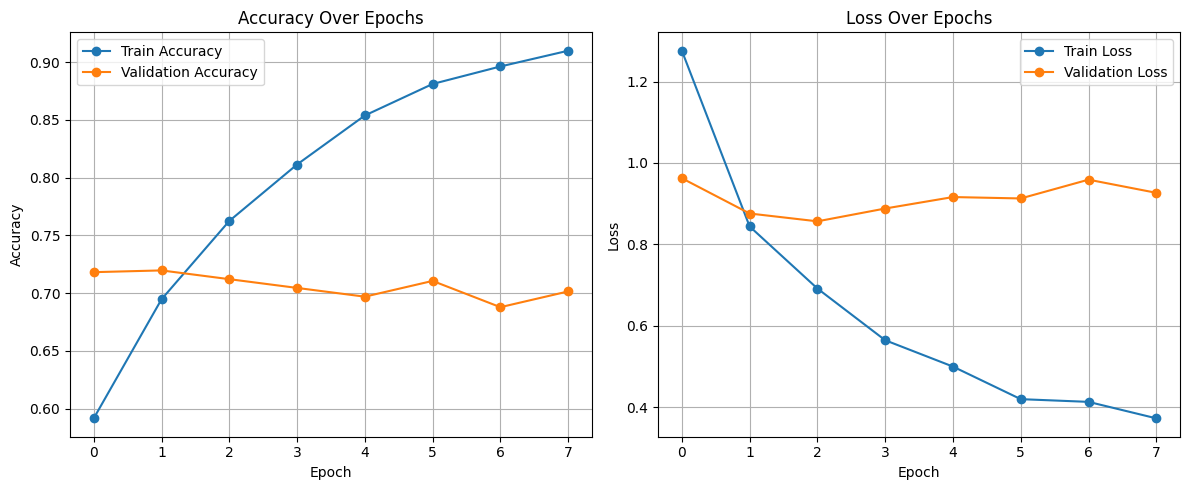

In [12]:
from services.cnn_model import plot_history

plot_history(history)

21/21 [==============================] - 14s 628ms/step


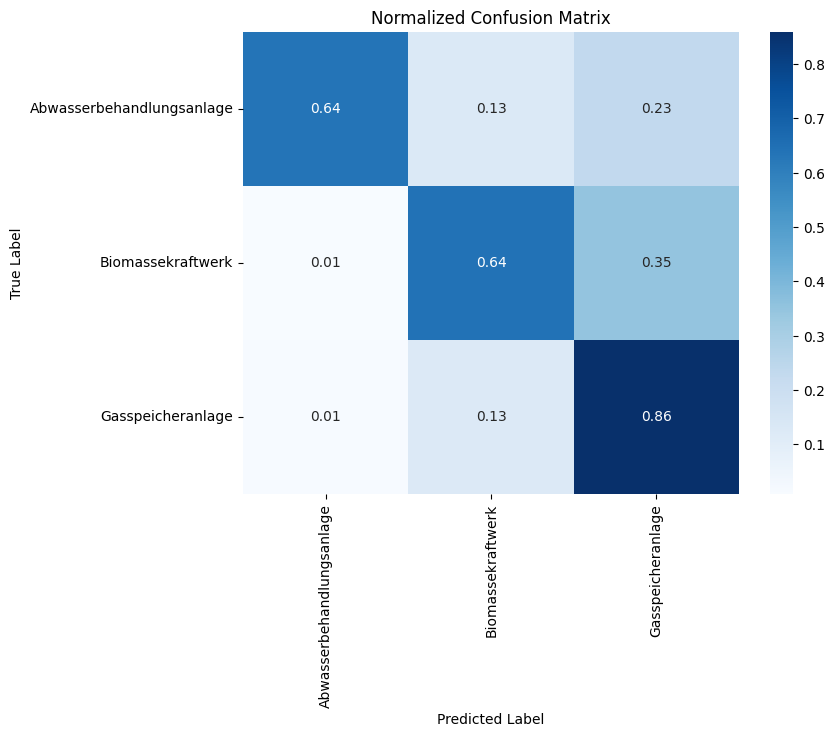

In [13]:
from services.cnn_model import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, label_encoder)